In [1]:
# =============================================================
# Copyright © 2020 Intel Corporation
# 
# SPDX-License-Identifier: MIT
# =============================================================

# Modin Getting Started Example for Distributed Pandas

## Importing and Organizing Data

In this example we will be generating a **synthetic dataset** and **demonstrating stock Pandas operations running with Modin**.

Let's start by **importing** all the necessary packages and modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

## How to Use Modin

We will also be importing **stock Pandas as pd** and **Modin as mpd to show differentiation**. You can see importing Modin is simple and **does not require any additional steps.**

In [3]:
import pandas

In [4]:
import modin.pandas as pd

We will now **generate a synthetic dataset** using NumPy to use with Modin and save it to a CSV.

In [5]:
array=np.random.randint(low=100,high=10000,size=(2**18,2**8))
#array
np.savetxt("foo.csv", array, delimiter=",") #how to generate array

Now we will convert the ndarray into a Pandas dataframe and display the first five rows.
For **stock pandas, the dataframe is being stored as `pandas_df`** and for **Modin, the same dataframe is being stored as `modin_df`**.
Let's try running the following cell with Pandas first.

In [6]:
%%time
pandas_df = pandas.read_csv("foo.csv", names=["col{}".format(i) for i in range(256)])
pandas_df.head()

CPU times: user 20.8 s, sys: 2.37 s, total: 23.1 s
Wall time: 41.3 s


,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col246,col247,col248,col249,col250,col251,col252,col253,col254,col255
0,6345.0,2081.0,7921.0,9496.0,6608.0,559.0,4217.0,5153.0,1586.0,4832.0,...,9964.0,7510.0,2537.0,3299.0,3707.0,8463.0,1804.0,6827.0,4438.0,5561.0
1,5096.0,6083.0,4583.0,5166.0,9979.0,1764.0,3488.0,6638.0,7839.0,1835.0,...,9282.0,3421.0,1357.0,5794.0,9747.0,7943.0,5627.0,7367.0,4484.0,3229.0
2,830.0,8249.0,8147.0,4841.0,3653.0,8775.0,8487.0,1520.0,3859.0,6732.0,...,5292.0,6504.0,9121.0,486.0,3346.0,1295.0,2356.0,2050.0,5128.0,7205.0
3,1664.0,8191.0,4497.0,1681.0,2603.0,5248.0,3423.0,2455.0,627.0,4653.0,...,4429.0,9200.0,6623.0,3711.0,9459.0,6626.0,8430.0,1501.0,5156.0,2010.0
4,9123.0,7135.0,7103.0,6864.0,6241.0,1218.0,5124.0,3380.0,8765.0,8670.0,...,8698.0,2234.0,3907.0,6643.0,7001.0,3130.0,2898.0,5262.0,6068.0,1108.0


Now let's run the same code, but use **Modin instead of stock Pandas.**

**Note the speedup!**

In [7]:
%%time
modin_df=pd.read_csv("foo.csv", names=["col{}".format(i) for i in range(256)])
modin_df.head()

CPU times: user 1.18 s, sys: 561 ms, total: 1.74 s
Wall time: 1.7 s


,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col246,col247,col248,col249,col250,col251,col252,col253,col254,col255
0,6345.0,2081.0,7921.0,9496.0,6608.0,559.0,4217.0,5153.0,1586.0,4832.0,...,9964.0,7510.0,2537.0,3299.0,3707.0,8463.0,1804.0,6827.0,4438.0,5561.0
1,5096.0,6083.0,4583.0,5166.0,9979.0,1764.0,3488.0,6638.0,7839.0,1835.0,...,9282.0,3421.0,1357.0,5794.0,9747.0,7943.0,5627.0,7367.0,4484.0,3229.0
2,830.0,8249.0,8147.0,4841.0,3653.0,8775.0,8487.0,1520.0,3859.0,6732.0,...,5292.0,6504.0,9121.0,486.0,3346.0,1295.0,2356.0,2050.0,5128.0,7205.0
3,1664.0,8191.0,4497.0,1681.0,2603.0,5248.0,3423.0,2455.0,627.0,4653.0,...,4429.0,9200.0,6623.0,3711.0,9459.0,6626.0,8430.0,1501.0,5156.0,2010.0
4,9123.0,7135.0,7103.0,6864.0,6241.0,1218.0,5124.0,3380.0,8765.0,8670.0,...,8698.0,2234.0,3907.0,6643.0,7001.0,3130.0,2898.0,5262.0,6068.0,1108.0


Let's now **visualize** this speedup from Modin with a plot!

In [8]:
def plotter(outputdict):
    fig = plt.figure(figsize = (10, 5)) 
    plt.bar(outputdict.keys(),outputdict.values(),color='blue',width=0.4)
    plt.xlabel("Python Package")
    plt.ylabel("Runtime(seconds)")
    plt.show()

Pandas Time(seconds): 14.217443943023682 
Modin Time(seconds): 1.6227927207946777


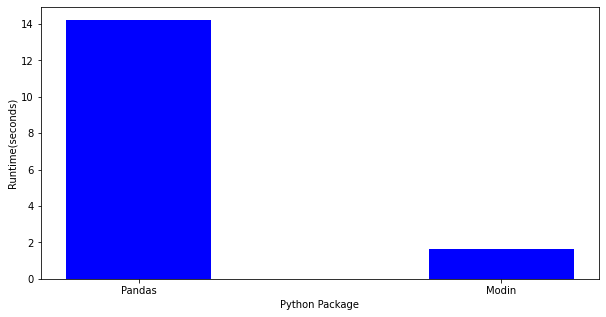

In [9]:
t0 = time.time()
pandas_df = pandas.read_csv("foo.csv", names=["col{}".format(i) for i in range(256)])
pandas_time = time.time()- t0

t1 = time.time()
modin_df = pd.read_csv("foo.csv", names=["col{}".format(i) for i in range(256)])
modin_time = time.time() - t1

print("Pandas Time(seconds):",pandas_time,"\nModin Time(seconds):",modin_time)
outputDict={"Pandas":pandas_time,"Modin":modin_time}
plotter(outputDict)

## Other DataFrame Function Performance Example
We will now show the speedup in performance from Modin compared to stock Pandas with a few common functions.

Like before, **`pandas_df` is for  stock Pandas**, **`modin_df` is for Modin**.

### `df.mean()`

In [10]:
# Mean
t2 = time.time()
pandas_df.mean(axis=0)
pandas_time=time.time()- t2
print(" stock Pandas wall time for completion in seconds:",pandas_time)

 stock Pandas wall time for completion in seconds: 0.9837145805358887


In [11]:
# Mean
t3 = time.time()
modin_df.mean(axis=0)
modin_time=time.time()- t3
print("Modin wall time for completion in seconds:",modin_time)

Modin wall time for completion in seconds: 0.7385618686676025


In [12]:
print("Modin was {}X faster than stock Pandas!".format(round(pandas_time/modin_time, 2)))

Modin was 1.33X faster than stock Pandas!


### `df.applymap`

In [13]:
# Long apply function
t6 = time.time()
print(pandas_df.applymap(lambda x: x + 1))
pandas_time = time.time() - t6
print(" stock Pandas wall time for completion in seconds:",pandas_time)

          col0    col1    col2    col3    col4    col5    col6    col7  \
0       6346.0  2082.0  7922.0  9497.0  6609.0   560.0  4218.0  5154.0   
1       5097.0  6084.0  4584.0  5167.0  9980.0  1765.0  3489.0  6639.0   
2        831.0  8250.0  8148.0  4842.0  3654.0  8776.0  8488.0  1521.0   
3       1665.0  8192.0  4498.0  1682.0  2604.0  5249.0  3424.0  2456.0   
4       9124.0  7136.0  7104.0  6865.0  6242.0  1219.0  5125.0  3381.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
262139  3860.0  8483.0  1058.0  4600.0  6865.0  4951.0  7001.0  2277.0   
262140  4713.0  1984.0  8267.0  9303.0  2713.0  5600.0  3888.0   602.0   
262141  9180.0  5590.0  6343.0  2092.0  3558.0  1236.0  9933.0  9230.0   
262142  4932.0  5320.0  9927.0  1281.0  5204.0  7580.0   733.0  4530.0   
262143  5765.0  8673.0  4102.0  2393.0  7379.0  9827.0  3356.0  4600.0   

          col8    col9  ...  col246  col247  col248  col249  col250  col251  \
0       1587.0  4833.0  ...  996

In [14]:
# Long apply function
t7 = time.time()
print(modin_df.applymap(lambda x: x + 1))
modin_time = time.time() - t7
print("Modin wall time for completion in seconds:",modin_time)

          col0    col1    col2    col3    col4    col5    col6    col7  \
0       6346.0  2082.0  7922.0  9497.0  6609.0   560.0  4218.0  5154.0   
1       5097.0  6084.0  4584.0  5167.0  9980.0  1765.0  3489.0  6639.0   
2        831.0  8250.0  8148.0  4842.0  3654.0  8776.0  8488.0  1521.0   
3       1665.0  8192.0  4498.0  1682.0  2604.0  5249.0  3424.0  2456.0   
4       9124.0  7136.0  7104.0  6865.0  6242.0  1219.0  5125.0  3381.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
262139  3860.0  8483.0  1058.0  4600.0  6865.0  4951.0  7001.0  2277.0   
262140  4713.0  1984.0  8267.0  9303.0  2713.0  5600.0  3888.0   602.0   
262141  9180.0  5590.0  6343.0  2092.0  3558.0  1236.0  9933.0  9230.0   
262142  4932.0  5320.0  9927.0  1281.0  5204.0  7580.0   733.0  4530.0   
262143  5765.0  8673.0  4102.0  2393.0  7379.0  9827.0  3356.0  4600.0   

          col8    col9  ...  col246  col247  col248  col249  col250  col251  \
0       1587.0  4833.0  ...  996

In [15]:
print("Modin was {}X faster than stock Pandas!".format(round(pandas_time/modin_time, 2)))

Modin was 7.04X faster than stock Pandas!


### `pd.concat([df, df])`

In [16]:
# Concat
t8 = time.time()
print(pandas.concat([pandas_df, pandas_df], axis=0))
pandas_time = time.time() - t8
print("stock Pandas wall time for completion in seconds:",pandas_time)

          col0    col1    col2    col3    col4    col5    col6    col7  \
0       6345.0  2081.0  7921.0  9496.0  6608.0   559.0  4217.0  5153.0   
1       5096.0  6083.0  4583.0  5166.0  9979.0  1764.0  3488.0  6638.0   
2        830.0  8249.0  8147.0  4841.0  3653.0  8775.0  8487.0  1520.0   
3       1664.0  8191.0  4497.0  1681.0  2603.0  5248.0  3423.0  2455.0   
4       9123.0  7135.0  7103.0  6864.0  6241.0  1218.0  5124.0  3380.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
262139  3859.0  8482.0  1057.0  4599.0  6864.0  4950.0  7000.0  2276.0   
262140  4712.0  1983.0  8266.0  9302.0  2712.0  5599.0  3887.0   601.0   
262141  9179.0  5589.0  6342.0  2091.0  3557.0  1235.0  9932.0  9229.0   
262142  4931.0  5319.0  9926.0  1280.0  5203.0  7579.0   732.0  4529.0   
262143  5764.0  8672.0  4101.0  2392.0  7378.0  9826.0  3355.0  4599.0   

          col8    col9  ...  col246  col247  col248  col249  col250  col251  \
0       1586.0  4832.0  ...  996

In [17]:
# Concat
t9 = time.time()
print(pd.concat([modin_df, modin_df], axis=0))
modin_time = time.time() - t9
print("Modin wall time for completion in seconds:",modin_time)

          col0    col1    col2    col3    col4    col5    col6    col7  \
0       6345.0  2081.0  7921.0  9496.0  6608.0   559.0  4217.0  5153.0   
1       5096.0  6083.0  4583.0  5166.0  9979.0  1764.0  3488.0  6638.0   
2        830.0  8249.0  8147.0  4841.0  3653.0  8775.0  8487.0  1520.0   
3       1664.0  8191.0  4497.0  1681.0  2603.0  5248.0  3423.0  2455.0   
4       9123.0  7135.0  7103.0  6864.0  6241.0  1218.0  5124.0  3380.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
262139  3859.0  8482.0  1057.0  4599.0  6864.0  4950.0  7000.0  2276.0   
262140  4712.0  1983.0  8266.0  9302.0  2712.0  5599.0  3887.0   601.0   
262141  9179.0  5589.0  6342.0  2091.0  3557.0  1235.0  9932.0  9229.0   
262142  4931.0  5319.0  9926.0  1280.0  5203.0  7579.0   732.0  4529.0   
262143  5764.0  8672.0  4101.0  2392.0  7378.0  9826.0  3355.0  4599.0   

          col8    col9  ...  col246  col247  col248  col249  col250  col251  \
0       1586.0  4832.0  ...  996

In [18]:
print("Modin was {}X faster than stock Pandas!".format(round(pandas_time/modin_time, 2)))

Modin was 6.23X faster than stock Pandas!


## Modin Coverage Examples 
The Modin package supports a large variety of Pandas functions.
Here are some examples:

### Count

In [19]:
modin_df.count()

col0      262144
col1      262144
col2      262144
col3      262144
col4      262144
           ...  
col251    262144
col252    262144
col253    262144
col254    262144
col255    262144
Length: 256, dtype: int64

### Filter

In [20]:
modin_df.filter(regex='0$', axis=1)

,col0,col10,col20,col30,col40,col50,col60,col70,col80,col90,...,col160,col170,col180,col190,col200,col210,col220,col230,col240,col250
0,6345.0,286.0,1493.0,6986.0,4580.0,734.0,6619.0,7964.0,1824.0,1250.0,...,7122.0,5886.0,4054.0,5507.0,3053.0,4773.0,4246.0,9478.0,7245.0,3707.0
1,5096.0,2352.0,9894.0,6507.0,8849.0,4522.0,2432.0,8412.0,9796.0,568.0,...,582.0,9429.0,8460.0,3679.0,1739.0,2352.0,7968.0,4017.0,2419.0,9747.0
2,830.0,1354.0,7592.0,6253.0,105.0,2593.0,7495.0,511.0,9733.0,5618.0,...,4022.0,9047.0,612.0,8941.0,8065.0,4535.0,6304.0,4003.0,8345.0,3346.0
3,1664.0,9940.0,4394.0,8826.0,8244.0,7933.0,280.0,7272.0,9322.0,1085.0,...,3254.0,4255.0,9267.0,6334.0,2688.0,1990.0,985.0,4882.0,3814.0,9459.0
4,9123.0,6120.0,9942.0,5088.0,5395.0,7489.0,9291.0,1057.0,3037.0,474.0,...,4983.0,8882.0,6405.0,1257.0,2396.0,5760.0,9736.0,6131.0,5044.0,7001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262139,3859.0,9485.0,9796.0,1815.0,2169.0,9267.0,3499.0,1303.0,4196.0,8549.0,...,851.0,6952.0,8912.0,9244.0,5857.0,587.0,6875.0,6576.0,6606.0,591.0
262140,4712.0,4106.0,9898.0,4047.0,2967.0,7558.0,5543.0,100.0,2927.0,3586.0,...,5624.0,4916.0,2909.0,2889.0,6739.0,5288.0,2252.0,2408.0,8249.0,6157.0
262141,9179.0,842.0,2631.0,857.0,2607.0,2466.0,8240.0,8494.0,9493.0,1989.0,...,7102.0,6900.0,4167.0,1885.0,1866.0,1142.0,3215.0,3379.0,9319.0,4097.0
262142,4931.0,4134.0,6140.0,2902.0,7761.0,4194.0,1022.0,8984.0,7636.0,5967.0,...,4994.0,4574.0,8812.0,3448.0,9196.0,2757.0,3995.0,5733.0,5525.0,5152.0


### iloc

In [21]:
modin_df.iloc[0]
modin_df.iloc[-1]
modin_df.iloc[:,0]
modin_df.iloc[:,-1]

0         5561.0
1         3229.0
2         7205.0
3         2010.0
4         1108.0
           ...  
262139    2481.0
262140    1902.0
262141    8721.0
262142     998.0
262143    3934.0
Name: col255, Length: 262144, dtype: float64

## Series

In [22]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

### DataFrame to NumPy Array

In [23]:
modin_df.to_numpy()

array([[6345., 2081., 7921., ..., 6827., 4438., 5561.],
       [5096., 6083., 4583., ..., 7367., 4484., 3229.],
       [ 830., 8249., 8147., ..., 2050., 5128., 7205.],
       ...,
       [9179., 5589., 6342., ..., 8758., 3981., 8721.],
       [4931., 5319., 9926., ..., 9118., 9298.,  998.],
       [5764., 8672., 4101., ..., 6967., 5994., 3934.]])

### Series to NumPy Array

In [24]:
ser = pd.Series(pd.date_range('2000', periods=2, tz="CET"))
ser.to_numpy(dtype=object)
ser.to_numpy(dtype="datetime64[ns]")

array(['1999-12-31T23:00:00.000000000', '2000-01-01T23:00:00.000000000'],
      dtype='datetime64[ns]')

### Set Options

In [25]:
pd.set_option('compute.use_bottleneck', False)
pd.set_option('compute.use_numexpr', False)

### Unique Function for Series

In [26]:
pd.unique(pd.Series([2, 1, 3, 3]))

array([2, 1, 3])

In [27]:
print("[CODE_SAMPLE_COMPLETED_SUCCESFULLY]")

[CODE_SAMPLE_COMPLETED_SUCCESFULLY]
